In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv("Emission.csv")




In [3]:
data

,Year-Month,CO2 Emission
0,1973-Jan,106.363
1,1973-Feb,101.760
2,1973-Mar,110.553
3,1973-Apr,104.734
4,1973-May,114.897
...,...,...
481,2013-Feb,134.243
482,2013-Mar,153.078
483,2013-Apr,149.442
484,2013-May,156.356


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year-Month    486 non-null    object 
 1   CO2 Emission  486 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


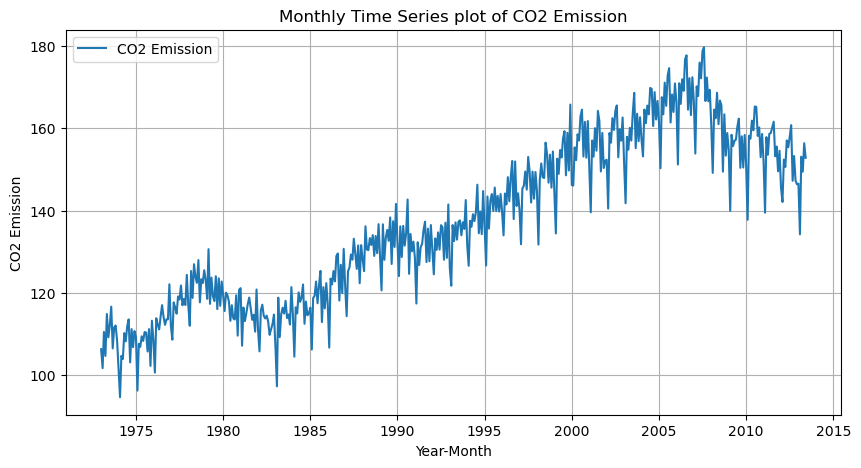

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Year-Month' to datetime and set it as the index
data['Year-Month'] = pd.to_datetime(data['Year-Month'], format='%Y-%b')
data.set_index('Year-Month', inplace=True)

# Plot the CO2 Emission
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['CO2 Emission'], label='CO2 Emission')
plt.xlabel('Year-Month')
plt.ylabel('CO2 Emission')
plt.title('Monthly Time Series plot of CO2 Emission')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset


# Ensure the dataset is sorted by the 'Year-Month' column
data = data.sort_values('Year-Month')

# Split the data into training (80%) and test (20%) sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare the training and test data
train_data = train['CO2 Emission']
test_data = test['CO2 Emission']

# Build and fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_data, initialization_method='estimated').fit(optimized=True)

# Forecast the test data
predictions = model.forecast(len(test_data))

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Print the RMSE rounded to 4 decimal places
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Root Mean Squared Error (RMSE): 9.9224


C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [8]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset


# Ensure the dataset is sorted by the 'Year-Month' column
data = data.sort_values('Year-Month')

# Split the data into training (80%) and test (20%) sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare the training and test data
train_data = train['CO2 Emission']
test_data = test['CO2 Emission']

# Build and fit the Double Exponential Smoothing model
model = ExponentialSmoothing(train_data, trend='add', initialization_method='estimated').fit(optimized=True)

# Forecast the test data
predictions = model.forecast(len(test_data))

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Print the RMSE rounded to 4 decimal places
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Root Mean Squared Error (RMSE): 22.4040


C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset


# Ensure the dataset is sorted by the 'Year-Month' column
data = data.sort_values('Year-Month')

# Split the data into training (80%) and test (20%) sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare the training and test data
train_data = np.log(train['CO2 Emission'])
test_data = np.log(test['CO2 Emission'])

# Build and fit the Simple Exponential Smoothing model on the log-transformed data
model = SimpleExpSmoothing(train_data, initialization_method='estimated').fit(optimized=True)

# Forecast the test data
predictions = model.forecast(len(test_data))

# Calculate the Root Mean Squared Error (RMSE) on the log-transformed data
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Print the RMSE rounded to 4 decimal places
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Root Mean Squared Error (RMSE): 0.0630


C:\Users\sakth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
